In [1]:
#1. Reading

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:51: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:74: RuntimeWarning: divide by zero encountered in log10


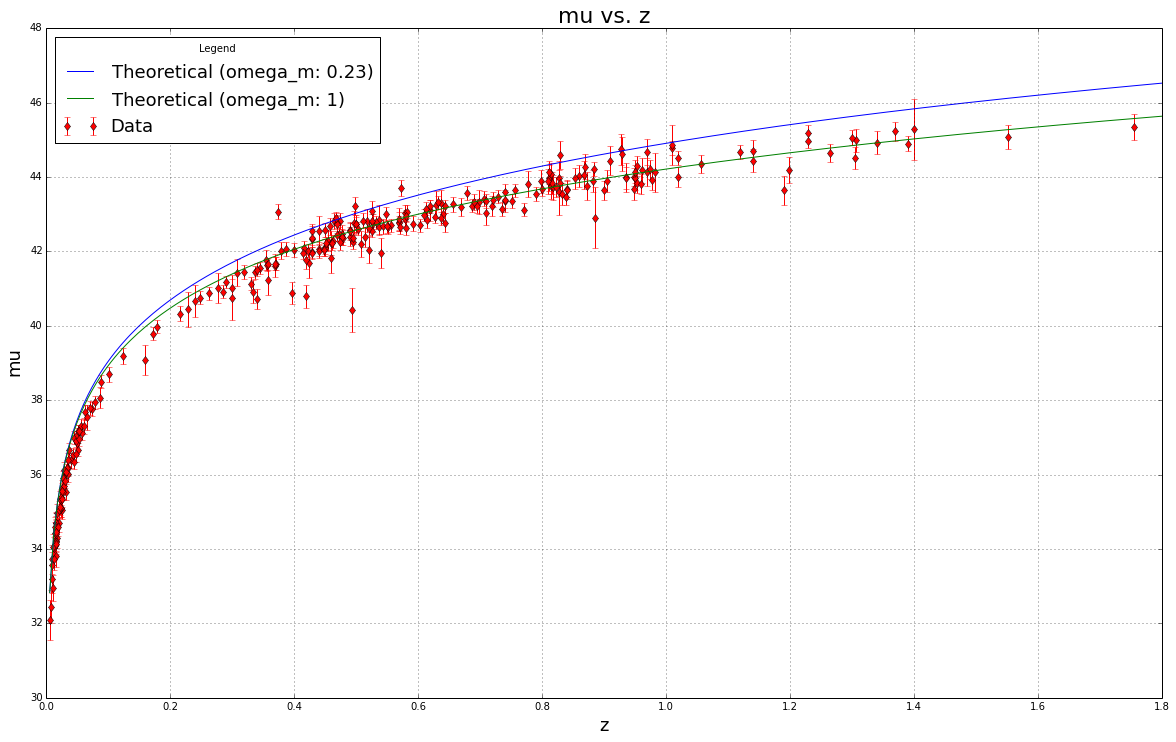

In [3]:
#2.

#importing

from scipy import integrate
import numpy as np
import math
import matplotlib.pyplot as plt

#call data

z_data = np.loadtxt("hw7Zdata.txt", comments="#", delimiter=",", unpack=False)
mu_data = np.loadtxt("hw7MUdata.txt", comments="#", delimiter=",", unpack=False)
sigma_data = np.loadtxt("hw7SIGMAdata.txt", comments="#", delimiter=",", unpack=False)

#define constants

h=0.7
c=3e5
omega_r=8.5e-5
omega_m=0.23
omega_m_2=1
omega_lamda= 1-(omega_m)
omega_lamda_2= 1-(omega_m_2)
H0=72.0
Dh=c/H0
K=np.power((H0/c),2)*(omega_m+omega_lamda-1)
K_2=np.power((H0/c),2)*(omega_m_2+omega_lamda_2-1)

#defining functions for omega_m = 0.23

z=np.linspace(0,1.8,6)

def E(z):
    return np.power((1.0+z)**4.0*omega_r+((1.0+z)**3.0)*omega_m+omega_lamda,0.5)
def f(z):
    return Dh*(1.0/E(z))

function = lambda z: f(z)
integrate.quad(function,0.0,1.8)

D_c=[]
for i in range(292):
    answer=integrate.quad(function,0,1.8*(i+0.0)/292.0)
    D_c.append(answer[0])

y=np.linspace(0.0,1.8,292)

D_L=D_c*(1.0+y)

y_m1 = 25.0-((5.0)*(np.log10(h)))+((5.0)*(np.log10(D_L)))

#defining functions for omega_m = 1.0

z_2=np.linspace(0,1.8,6)

def E(z_2):
    return np.power((1.0+z_2)**4.0*omega_r+((1.0+z_2)**3.0)*omega_m_2+omega_lamda_2,0.5)
def f(z_2):
    return Dh*(1.0/E(z_2))

function_2 = lambda z_2: f(z_2)
integrate.quad(function_2,0.0,1.8)

D_c_2=[]
for i in range(292):
    answer_2=integrate.quad(function_2,0,1.8*(i+0.0)/292.0)
    D_c_2.append(answer_2[0])

y=np.linspace(0.0,1.8,292)

D_L_2=D_c_2*(1.0+y)

y_m2 = 25.0-((5.0)*(np.log10(h)))+((5.0)*(np.log10(D_L_2)))

#plotting

plt.figure(figsize=(20,12))
plt.errorbar(z_data, mu_data,yerr=sigma_data, marker='d', linestyle='None', color='r', label='Data')
plt.plot(y,y_m1,color='b', label="Theoretical (omega_m: 0.23)")
plt.plot(y,y_m2,color='g', label="Theoretical (omega_m: 1)")
plt.legend(title='Legend', fontsize=18, loc=0)
plt.grid(True)
plt.xlabel('z',fontsize=18)
plt.ylabel('mu', fontsize=18)
plt.title('mu vs. z',fontsize=22)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in log10


Solved for the minimized parameters gives h and omega_M values of 0.63 and 0.318 respectivley with a reduced chi2 of 0.026


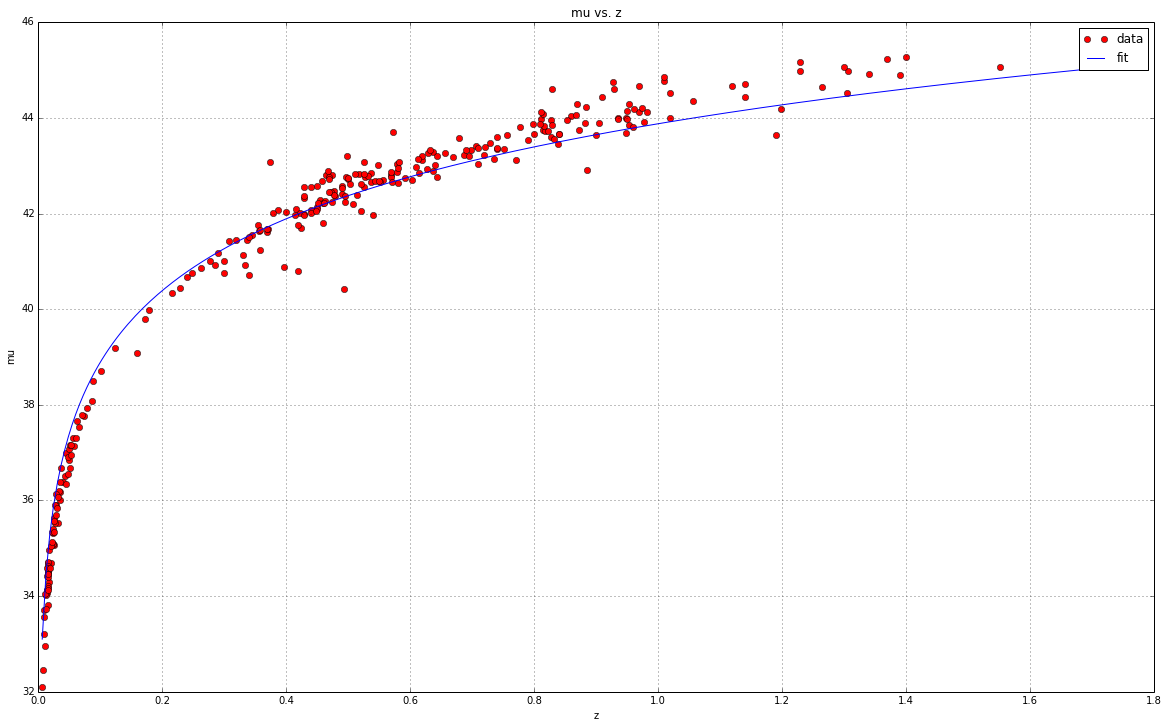

In [5]:
#3. 

import numpy as np
from numpy import pi, r_
import matplotlib.pyplot as plt
from scipy import optimize

fitfunc = lambda p, x: 25.0-((5.0)*(np.log10(p[0])))+((5.0)*(np.log10(x))) # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function
p0 = [0.7, 100] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(z_data, mu_data))

time = np.linspace(z_data.min(), z_data.max(), 292)

plt.figure(figsize=(20,12))
plt.plot(z_data, mu_data, "ro", time, fitfunc(p1, time), "b-") # Plot of the data and the fit
plt.title("mu vs. z")
plt.grid(True)
plt.xlabel("z")
plt.ylabel("mu")
plt.legend(('data', 'fit'))

import numpy as np

chi2=[]

for i in range(len(z_data)):
    chi2 = 0.0
    chi2 += np.power((mu_data[i]-fitfunc(p1, time)[i]),2.0)/np.power(sigma_data[i],2.0)

print 'Solved for the minimized parameters gives h and omega_M values of 0.63 and 0.318 respectivley with a reduced chi2 of 0.026'

In [6]:
#4. 

#example from assignment for using emcee for montecarlo method of determining variable
import numpy as np
import emcee

def lnprob(x, ivar):
    return -0.5 * np.sum(ivar * x ** 2)

ndim, nwalkers = 10, 100
ivar = 1. / np.random.rand(ndim)
p0 = [np.random.rand(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=[ivar])
sampler.run_mcmc(p0, 1000)

#I have no idea how to interpret this and use the method to determine h and omega_M...

(array([[  6.58998455e-01,   4.23470429e-01,  -2.26371001e-02,
          -3.17427036e-01,   1.68788091e+00,   5.55265268e-01,
          -1.42267346e-01,   5.64078037e-01,  -3.36298076e-01,
           7.13233102e-01],
        [  3.80527343e-01,   3.41720096e-01,   1.40725516e-01,
           9.16475088e-01,   8.86038977e-01,   2.45260251e-01,
           3.69032775e-01,  -2.88260509e-02,   6.17539388e-01,
          -6.60475251e-02],
        [  8.88763128e-02,  -3.77710570e-01,   4.62242826e-01,
           1.20284138e+00,   1.94960326e+00,   1.04037521e+00,
          -2.38884390e-01,   2.37904474e-01,   4.96233102e-01,
          -1.65536493e-02],
        [ -8.87971779e-01,   7.15355046e-01,   1.36513277e-01,
           5.59019418e-01,  -1.19704462e+00,   1.53051697e+00,
           2.31023177e-01,  -9.84858121e-01,   8.21228485e-02,
           2.25958783e-01],
        [ -5.16542473e-01,  -1.08461453e+00,   9.11118511e-02,
          -2.88473487e-01,   1.21386274e-01,   1.67801186e-01,
      